# Week-4 Excercise -2
 By-

**Pratinav Seth 200968216**

### Meta-Data
Here is a description of some of the features that are in the dataset.

MODELYEAR e.g. 2014

MAKE e.g. Acura

MODEL e.g. ILX

VEHICLE CLASS e.g. SUV

ENGINE SIZE e.g. 4.7

CYLINDERS e.g 6

TRANSMISSION e.g. A6

FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9

FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9

FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2

CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [19]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv("FuelConsumption.csv")

In [21]:
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


#### Q1a) Select the features 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB','CO2EMISSIONS' to use for building the model.


In [22]:
df2 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [23]:
df2.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


#### Q1b)Plot Emission values with respect to Engine size.

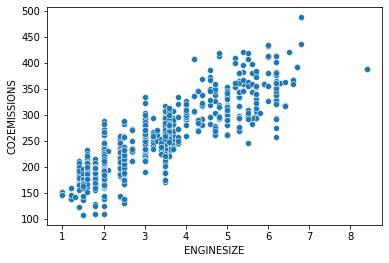

In [24]:
sns.scatterplot(data=df2, x="ENGINESIZE", y="CO2EMISSIONS")

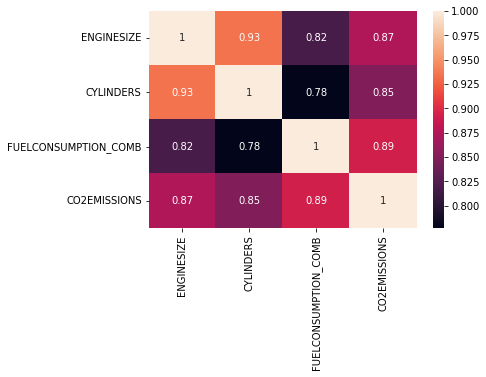

In [25]:
sns.heatmap(df2.corr(),annot=True)

#### Q2)Split the data into training and test sets (70:30) to create a model using training set, evaluate the model using test set, and use model to predict unknown value


In [26]:
X = df2.drop('CO2EMISSIONS',axis=1)

In [27]:
y = df2['CO2EMISSIONS']

In [28]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
lr = LinearRegression()
lr.fit(X_trainset, y_trainset)
y_pred = lr.predict(X_testset)
print("R2-SCORE: %.6f"% (r2_score(y_testset, y_pred)))
print("MAE: %.6f"% (mean_absolute_error(y_testset, y_pred)))
print("MSE: %.6f"% (mean_squared_error(y_testset, y_pred)))
print("Residual sum of squares: %.6f"% ((y_pred-y_testset) ** 2).sum())

R2-SCORE: 0.875145
MAE: 16.539300
MSE: 503.603151
Residual sum of squares: 161656.611334


#### Q3)Try to use a polynomial regression with the dataset of degree – 3, 4 & 5. Verify the accuracy by calculating Mean absolute error, Residual sum of squares, R2-score and comment on which model is the best


In [30]:
poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_trans = poly.fit_transform(X_trainset)
x_test_trans = poly.transform(X_testset)
lr = LinearRegression()
lr.fit(x_train_trans, y_trainset)
y_pred = lr.predict(x_test_trans)
print("R2-SCORE: %.6f"% (r2_score(y_testset, y_pred)))
print("MAE: %.6f"% (mean_absolute_error(y_testset, y_pred)))
print("MSE: %.6f"% (mean_squared_error(y_testset, y_pred)))
print("Residual sum of squares: %.6f"% ((y_pred-y_testset) ** 2).sum())

R2-SCORE: 0.932247
MAE: 10.230712
MSE: 273.279769
Residual sum of squares: 87722.805783


In [31]:
poly = PolynomialFeatures(degree=4, include_bias=True)
x_train_trans = poly.fit_transform(X_trainset)
x_test_trans = poly.transform(X_testset)
lr = LinearRegression()
lr.fit(x_train_trans, y_trainset)
y_pred = lr.predict(x_test_trans)

print("R2-SCORE: %.6f"% (r2_score(y_testset, y_pred)))
print("MAE: %.6f"% (mean_absolute_error(y_testset, y_pred)))
print("MSE: %.6f"% (mean_squared_error(y_testset, y_pred)))
print("Residual sum of squares: %.6f"% ((y_pred-y_testset) ** 2).sum())

R2-SCORE: 0.935932
MAE: 9.645981
MSE: 258.419310
Residual sum of squares: 82952.598384


In [32]:
poly = PolynomialFeatures(degree=5, include_bias=True)
x_train_trans = poly.fit_transform(X_trainset)
x_test_trans = poly.transform(X_testset)
lr = LinearRegression()
lr.fit(x_train_trans, y_trainset)
y_pred = lr.predict(x_test_trans)

print("R2-SCORE: %.6f"% (r2_score(y_testset, y_pred)))
print("MAE: %.6f"% (mean_absolute_error(y_testset, y_pred)))
print("MSE: %.6f"% (mean_squared_error(y_testset, y_pred)))
print("Residual sum of squares: %.6f"% ((y_pred-y_testset) ** 2).sum())

R2-SCORE: 0.942617
MAE: 8.255203
MSE: 231.455339
Residual sum of squares: 74297.163881


By the Observation we observe polynomial equation of **degree-5** have the **highest** **R2-Score**, **least MAE,MSE and RSS**. 

With R2 being 0.94xx we can say around 94% of the variation in the output variable is explained by the input variables.

**Thus, we can conclude model with polynomial degree 5 as the best fit for dataset.**

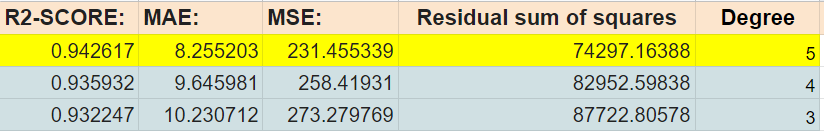

Trying other degree polynomials including 2,6,7,8,etc. 

We find our model performs good only at degree 2 .

It becomes worse with degree greater than 5 which is shown by MAE,MSE,R2-SCORE.

In [33]:
poly = PolynomialFeatures(degree=6, include_bias=True)
x_train_trans = poly.fit_transform(X_trainset)
x_test_trans = poly.transform(X_testset)
lr = LinearRegression()
lr.fit(x_train_trans, y_trainset)
y_pred = lr.predict(x_test_trans)

print("R2-SCORE: %.6f"% (r2_score(y_testset, y_pred)))
print("MAE: %.6f"% (mean_absolute_error(y_testset, y_pred)))
print("MSE: %.6f"% (mean_squared_error(y_testset, y_pred)))
print("Residual sum of squares: %.6f"% ((y_pred-y_testset) ** 2).sum())

R2-SCORE: -32.524232
MAE: 31.231344
MSE: 135219.891594
Residual sum of squares: 43405585.201754


In [34]:
poly = PolynomialFeatures(degree=7, include_bias=True)
x_train_trans = poly.fit_transform(X_trainset)
x_test_trans = poly.transform(X_testset)
lr = LinearRegression()
lr.fit(x_train_trans, y_trainset)
y_pred = lr.predict(x_test_trans)

print("R2-SCORE: %.6f"% (r2_score(y_testset, y_pred)))
print("MAE: %.6f"% (mean_absolute_error(y_testset, y_pred)))
print("MSE: %.6f"% (mean_squared_error(y_testset, y_pred)))
print("Residual sum of squares: %.6f"% ((y_pred-y_testset) ** 2).sum())

R2-SCORE: -881.303444
MAE: 122.065602
MSE: 3558768.307102
Residual sum of squares: 1142364626.579592


In [35]:
poly = PolynomialFeatures(degree=8, include_bias=True)
x_train_trans = poly.fit_transform(X_trainset)
x_test_trans = poly.transform(X_testset)
lr = LinearRegression()
lr.fit(x_train_trans, y_trainset)
y_pred = lr.predict(x_test_trans)

print("R2-SCORE: %.6f"% (r2_score(y_testset, y_pred)))
print("MAE: %.6f"% (mean_absolute_error(y_testset, y_pred)))
print("MSE: %.6f"% (mean_squared_error(y_testset, y_pred)))
print("Residual sum of squares: %.6f"% ((y_pred-y_testset) ** 2).sum())

R2-SCORE: -40426.307712
MAE: 742.689030
MSE: 163063425.010816
Residual sum of squares: 52343359428.471992


In [36]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(X_trainset)
x_test_trans = poly.transform(X_testset)
lr = LinearRegression()
lr.fit(x_train_trans, y_trainset)
y_pred = lr.predict(x_test_trans)

print("R2-SCORE: %.6f"% (r2_score(y_testset, y_pred)))
print("MAE: %.6f"% (mean_absolute_error(y_testset, y_pred)))
print("MSE: %.6f"% (mean_squared_error(y_testset, y_pred)))
print("Residual sum of squares: %.6f"% ((y_pred-y_testset) ** 2).sum())

R2-SCORE: 0.919517
MAE: 10.471620
MSE: 324.628011
Residual sum of squares: 104205.591593
